In [1]:
#Loading Required Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the Bank Dataset(csv file)

bank = pd.read_csv("D:\Work\Imarticus\Machine Learning\Exam 1\\bank.csv", sep=';')

In [3]:
#Preview the dataset

bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
bank.shape #We see there are 41,188 observations and 21 columns

(41188, 21)

In [5]:
bank.info()
#We see most of the columns are of object type and few numerical data types.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
#We are building a pre-defined function to show how categorical values are disributed and plotting them in bar-plot.
def bar_plot(variable):
    # temp df 
    temp = pd.DataFrame()
    # count categorical values
    temp['No_deposit'] = bank[bank['y'] == 'no'][variable].value_counts()
    temp['Yes_deposit'] = bank[bank['y'] == 'yes'][variable].value_counts()
    temp.plot(kind='bar')
    plt.xlabel(f'{variable}')
    plt.ylabel('Number of clients')
    plt.title('Distribution of {} and deposit'.format(variable))
    plt.show();

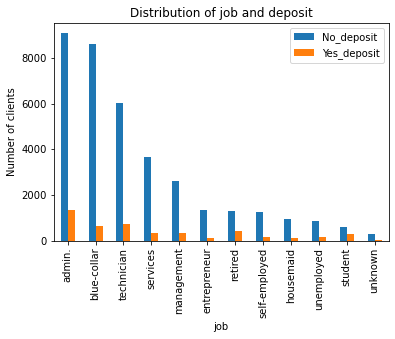

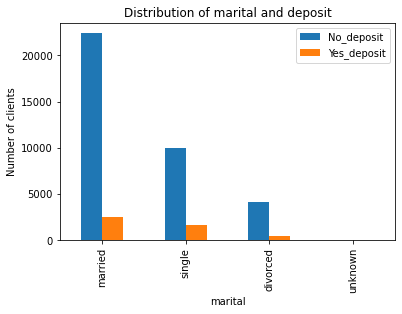

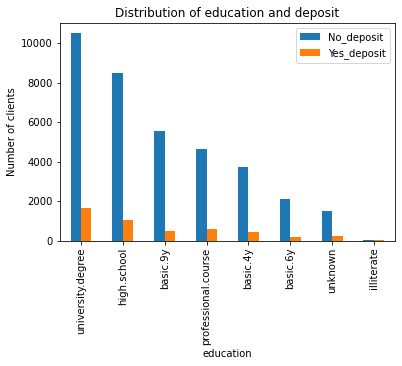

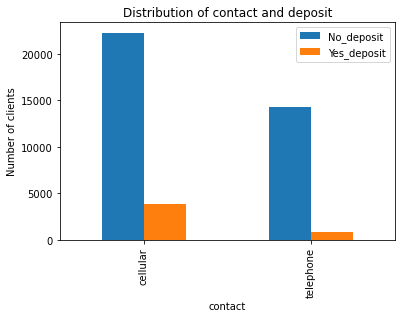

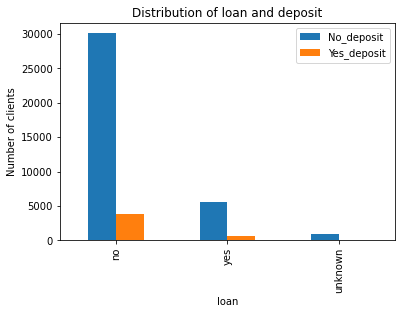

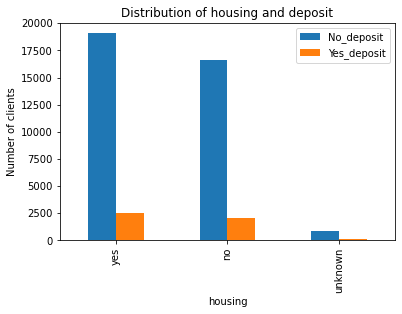

(None, None, None, None, None, None)

In [7]:
#We are plotting few important variables
bar_plot('job'), bar_plot('marital'), bar_plot('education'), bar_plot('contact'), bar_plot('loan'), bar_plot('housing')

Primary analysis of several categorical features reveals:

Administrative staff and technical specialists opened the deposit most of all. In relative terms, a high proportion of pensioners and students might be mentioned as well.

Although in absolute terms married consumers more often agreed to the service, in relative terms the single was responded better.

Best communication channel is cellular.

The difference is evident between consumers who already use the services of banks and received a loan.
Home ownership does not greatly affect marketing company performance.

In [8]:
bank1 = bank.copy()

In [9]:
#Exploratory Data Analysis

#Using Pre-Defined function to treat the Null Values.

def null_values(base_dataset):
    print(base_dataset.isna().sum())
    ##null value percentage
    null_value_table = (base_dataset.isna().sum()/base_dataset.shape[0])*100
    ## null value percentage beyond thershold drop, else treat the columns
    retained_columns = null_value_table[null_value_table<0].index
    # if any variable as null value greater than input(like 30% of the data) value than those variable
    #are considered as drop
    drop_columns = null_value_table[null_value_table>30].index
    base_dataset.drop(drop_columns, axis = 1, inplace = True)
    len(base_dataset.isna().sum().index)
    cont = base_dataset.describe().columns
    cat = [i for i in base_dataset.columns if i not in base_dataset.describe().columns]
    for i in cat:
        base_dataset[i].fillna(base_dataset[i].value_counts().index[0],inplace = True)
    for i in cont:
        base_dataset[i].fillna(base_dataset[i].median(),inplace = True)
    print(base_dataset.isna().sum())
    return base_dataset, cat, cont

In [10]:
bank1, cat, cont = null_values(bank)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [11]:
#Convert target variable into numeric
bank1.y = bank1.y.map({'no':0, 'yes':1}).astype('int64')

In [12]:
#Dummy variable Declaration

dummy_columns = []
for i in bank1.columns:
    if (bank1[i].nunique()>=3) & (bank1[i].nunique()<5):
        dummy_columns.append(i)
        
#Dummy Variable
dummies_tables = pd.get_dummies(bank1[dummy_columns])

#Adding the dummy variables to our dataset.
for i in dummies_tables.columns:
    bank1[i] = dummies_tables[i]
    
#Displaying columns after dummy variable creation
bank1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'marital_divorced',
       'marital_married', 'marital_single', 'marital_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [13]:
#Drop the existing columns after the ceation of dummy variable for those
bank1 = bank1.drop(dummy_columns, axis=1)

In [14]:
#Checking if the columns are dropped.
bank1.columns

Index(['age', 'job', 'education', 'contact', 'month', 'day_of_week',
       'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success'],
      dtype='object')

In [15]:
#Label Encoder
from sklearn.preprocessing import LabelEncoder
def label_encoders(data, cat):
    le=LabelEncoder()
    for i in cat :
        le.fit(data[i])
        x = le.transform(data[i])
        data[i] = x
    return data

In [16]:
bank_new = bank1
cat = bank1.describe(include="object").columns

label_encoders(bank_new, cat).head()

,age,job,education,contact,month,day_of_week,duration,campaign,pdays,previous,...,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,3,0,1,6,1,261,1,999,0,...,0,1,0,0,1,0,0,0,1,0
1,57,7,3,1,6,1,149,1,999,0,...,0,1,0,0,1,0,0,0,1,0
2,37,7,3,1,6,1,226,1,999,0,...,0,0,0,1,1,0,0,0,1,0
3,40,0,1,1,6,1,151,1,999,0,...,0,1,0,0,1,0,0,0,1,0
4,56,7,3,1,6,1,307,1,999,0,...,0,1,0,0,0,0,1,0,1,0


<AxesSubplot:>

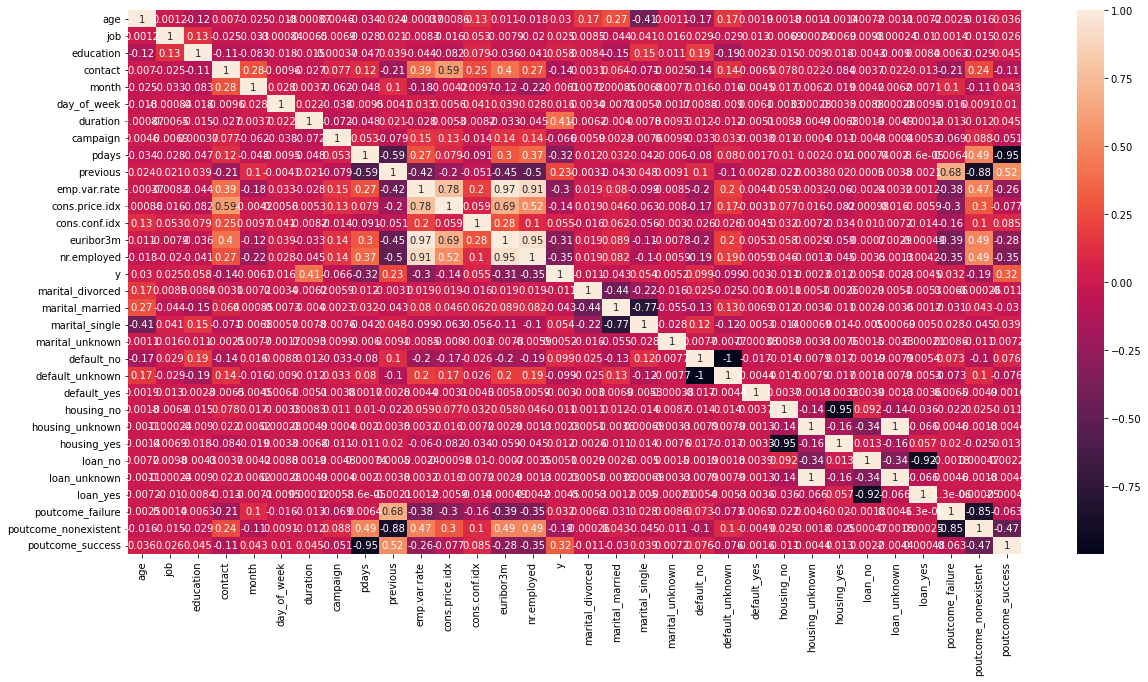

In [17]:
#Correlation between variables
plt.figure(figsize=(20,10))
sns.heatmap(bank_new.corr(), annot= True)

In [18]:
#FEATURE SELECTION

# Split the data into 40% test set and 60% training set

from sklearn.model_selection import train_test_split
x = bank_new.drop("y", axis=1)
y = bank_new["y"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4, random_state=0)

In [19]:
#Using RandomClassifier for feature selection
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000,random_state=0, n_jobs=-1)

clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10000, n_jobs=-1, random_state=0)

In [20]:
feat_labels = x.columns.values

#Pre-defined function to print the name and importance of each feature
feature_importance = []
for feature in zip(feat_labels, clf.feature_importances_):
    feature_importance.append(feature)

In [21]:
feature_importance

[('age', 0.08724528300684858),
 ('job', 0.04807964457612657),
 ('education', 0.04266008437610203),
 ('contact', 0.010053834143293512),
 ('month', 0.020332867431228224),
 ('day_of_week', 0.04104220755407728),
 ('duration', 0.29448167756626614),
 ('campaign', 0.041172233110513407),
 ('pdays', 0.03260978925583914),
 ('previous', 0.011723292054211241),
 ('emp.var.rate', 0.023425671329200124),
 ('cons.price.idx', 0.026202679870541253),
 ('cons.conf.idx', 0.029799392776175375),
 ('euribor3m', 0.10817869136014507),
 ('nr.employed', 0.059781825472753986),
 ('marital_divorced', 0.007299389407107405),
 ('marital_married', 0.011914804984219204),
 ('marital_single', 0.010931361073161127),
 ('marital_unknown', 0.0003106525260444642),
 ('default_no', 0.005499720569656213),
 ('default_unknown', 0.005446324070027088),
 ('default_yes', 9.245474196383679e-09),
 ('housing_no', 0.012707919225949188),
 ('housing_unknown', 0.0017659414701568972),
 ('housing_yes', 0.012634222222539428),
 ('loan_no', 0.009206

In [22]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(clf, threshold = 0.01)

In [23]:
sfm.fit(x_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=10000, n_jobs=-1,
                                                 random_state=0),
                threshold=0.01)

In [24]:
#Print the name of the most important features
selected_features = []

for feature_list_index in sfm.get_support(indices=True):
    selected_features.append(feat_labels[feature_list_index])
    
selected_features

['age',
 'job',
 'education',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'marital_married',
 'marital_single',
 'housing_no',
 'housing_yes',
 'poutcome_success']

In [25]:
data_selected = bank_new[selected_features]
data_selected.head()

,age,job,education,contact,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,marital_married,marital_single,housing_no,housing_yes,poutcome_success
0,56,3,0,1,6,1,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,1,0,0
1,57,7,3,1,6,1,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,1,0,0
2,37,7,3,1,6,1,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,1,0
3,40,0,1,1,6,1,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,1,0,0
4,56,7,3,1,6,1,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,1,0,0


In [26]:
#Handling unbalanced data using SMOTE

from collections import Counter
#summarize class distribution
counter = Counter(y)
print(counter)

#Data is imbalanced.

Counter({0: 36548, 1: 4640})


In [27]:
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
#transform the dataset
oversample = SMOTE()
x, y = oversample.fit_resample(x,y)
counter = Counter(y)
print(counter)

#Data is now balanced.

Counter({0: 36548, 1: 36548})


In [28]:
#Standardizing the data using the one of the scalers provided by sklearn

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data_selected)

MinMaxScaler()

In [29]:
data_standardized = scaler.fit_transform(data_selected)

We are build the following Supervised Learning models:
a. Logistic Regression
b. AdaBoost
c. Naïve Bayes
d. KNN
e. SVM

and then tabulating the metrics to compare which model is the best.

In [30]:
#Splitting the data
x = data_standardized
y = bank_new["y"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state=10)

# print the shape of 'x_train'
print('x_train:', x_train.shape)

# print the shape of 'x_test'
print('x_test:', x_test.shape)

# print the shape of 'y_train'
print('y_train:', y_train.shape)

# print the shape of 'y_test'
print('y_test:', y_test.shape)

x_train: (28831, 20)
x_test: (12357, 20)
y_train: (28831,)
y_test: (12357,)


In [31]:
#AdaBoost
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(random_state=10)
adaboost.fit(x_train,y_train)

AdaBoostClassifier(random_state=10)

In [32]:
y_pred_adaboost = adaboost.predict(x_test)

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_adaboost))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10935
           1       0.67      0.36      0.47      1422

    accuracy                           0.91     12357
   macro avg       0.79      0.67      0.71     12357
weighted avg       0.89      0.91      0.89     12357



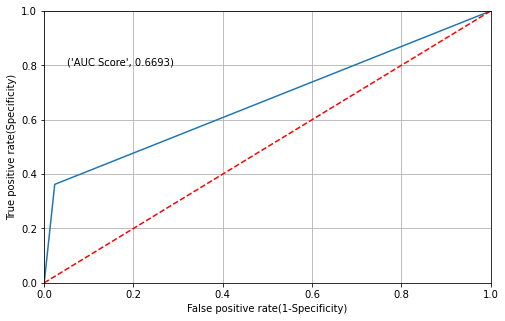

In [34]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

plt.rcParams['figure.figsize']=(8,5)

fpr,tpr,th = roc_curve(y_test,y_pred_adaboost)

plt.plot(fpr,tpr)

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.plot([0,1],[0,1],'r--') 

plt.text(x=0.05,y=0.8,s=('AUC Score',round(roc_auc_score(y_test,y_pred_adaboost),4)))

plt.xlabel('False positive rate(1-Specificity)')
plt.ylabel('True positive rate(Specificity)')

plt.grid(True)

In [35]:
from sklearn import metrics

cols = ['Model','Precision Score','Recall Score','Accuracy Score','f1-score']

result_tabulation = pd.DataFrame(columns=cols)

adaboost = pd.Series({"Model":"AdaBoost",
                        'Precision Score': metrics.precision_score(y_test,y_pred_adaboost,average="macro"),
                        'Recall Score': metrics.recall_score(y_test,y_pred_adaboost,average="macro"),
                        'Accuracy Score': metrics.accuracy_score(y_test,y_pred_adaboost),
                        'f1-score': metrics.f1_score(y_test,y_pred_adaboost,average="macro")})

result_tabulation = result_tabulation.append(adaboost , ignore_index=True)
result_tabulation

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,AdaBoost,0.793969,0.669286,0.905721,0.708757


In [36]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
knn.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [37]:
y_pred_knn = knn.predict(x_test)

In [38]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     10935
           1       0.56      0.27      0.37      1422

    accuracy                           0.89     12357
   macro avg       0.73      0.62      0.65     12357
weighted avg       0.87      0.89      0.87     12357



In [39]:
knn_mod = pd.Series({"Model":"KNN",
                        'Precision Score': metrics.precision_score(y_test,y_pred_knn,average="macro"),
                        'Recall Score': metrics.recall_score(y_test,y_pred_knn,average="macro"),
                        'Accuracy Score': metrics.accuracy_score(y_test,y_pred_knn),
                        'f1-score': metrics.f1_score(y_test,y_pred_knn,average="macro")})

result_tabulation = result_tabulation.append(knn_mod , ignore_index=True)
result_tabulation

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,AdaBoost,0.793969,0.669286,0.905721,0.708757
1,KNN,0.734447,0.622038,0.891398,0.653199


In [40]:
#SVM
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 1)
classifier.fit(x_train,y_train)

SVC(random_state=1)

In [41]:
y_pred_svm = classifier.predict(x_test)

In [42]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10935
           1       0.69      0.22      0.33      1422

    accuracy                           0.90     12357
   macro avg       0.80      0.60      0.64     12357
weighted avg       0.88      0.90      0.87     12357



In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_svm)
print("confusion_matrix\n",cm)
print('Lenght of t_test :',len(y_test))
accuracy = float(cm.diagonal().sum())/len(y_test)
print("\n Accuracy of SVM for the given Dataset : ",accuracy)

confusion_matrix
 [[10796   139]
 [ 1111   311]]
Lenght of t_test : 12357

 Accuracy of SVM for the given Dataset :  0.8988427611879906


In [44]:
svm_mod = pd.Series({"Model":"SVM",
                        'Precision Score': metrics.precision_score(y_test,y_pred_svm,average="macro"),
                        'Recall Score': metrics.recall_score(y_test,y_pred_svm,average="macro"),
                        'Accuracy Score': metrics.accuracy_score(y_test,y_pred_svm),
                        'f1-score': metrics.f1_score(y_test,y_pred_svm,average="macro")})

result_tabulation = result_tabulation.append(svm_mod , ignore_index=True)
result_tabulation

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,AdaBoost,0.793969,0.669286,0.905721,0.708757
1,KNN,0.734447,0.622038,0.891398,0.653199
2,SVM,0.798902,0.602997,0.898843,0.638771


In [45]:
#NaiveBayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [46]:
y_pred_nb = gnb.predict(x_test)
y_pred_nb

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [47]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93     10935
           1       0.47      0.51      0.49      1422

    accuracy                           0.88     12357
   macro avg       0.70      0.72      0.71     12357
weighted avg       0.88      0.88      0.88     12357



In [48]:
nb_mod = pd.Series({"Model":"Naive Bayes",
                        'Precision Score': metrics.precision_score(y_test,y_pred_nb,average="macro"),
                        'Recall Score': metrics.recall_score(y_test,y_pred_nb,average="macro"),
                        'Accuracy Score': metrics.accuracy_score(y_test,y_pred_nb),
                        'f1-score': metrics.f1_score(y_test,y_pred_nb,average="macro")})

result_tabulation = result_tabulation.append(nb_mod , ignore_index=True)
result_tabulation

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,AdaBoost,0.793969,0.669286,0.905721,0.708757
1,KNN,0.734447,0.622038,0.891398,0.653199
2,SVM,0.798902,0.602997,0.898843,0.638771
3,Naive Bayes,0.703603,0.716050,0.878045,0.709529


In [49]:
#Logistic Regreassion
from sklearn.linear_model import LogisticRegression

In [50]:
model = LogisticRegression()

In [51]:
model.fit(x_train,y_train)

LogisticRegression()

In [52]:
y_pred_log = model.predict(x_test)

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10935
           1       0.68      0.37      0.48      1422

    accuracy                           0.91     12357
   macro avg       0.80      0.67      0.71     12357
weighted avg       0.89      0.91      0.89     12357



In [54]:
log_reg = pd.Series({"Model":"Logistic-Regression",
                        'Precision Score': metrics.precision_score(y_test,y_pred_log,average="macro"),
                        'Recall Score': metrics.recall_score(y_test,y_pred_log,average="macro"),
                        'Accuracy Score': metrics.accuracy_score(y_test,y_pred_log),
                        'f1-score': metrics.f1_score(y_test,y_pred_log,average="macro")})

result_tabulation = result_tabulation.append(log_reg , ignore_index=True)
result_tabulation

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,AdaBoost,0.793969,0.669286,0.905721,0.708757
1,KNN,0.734447,0.622038,0.891398,0.653199
2,SVM,0.798902,0.602997,0.898843,0.638771
3,Naive Bayes,0.703603,0.716050,0.878045,0.709529
4,Logistic-Regression,0.799356,0.673428,0.907097,0.713596


*Here we can see that from our 5 models the best model is Logistic Reg. Although the accuracy of all the 5 models are more or less near to other models. All our models have high and good accuracy of more than 85%. We can use any of these models to predict further and will more or less a similar results but in the market as we choose the best we will either go with AdaBoost or Logistic Regression models.